In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


Before starting, i have the mention why this specific data and why am i doing all of this,apart from enjoying of course :), this data has been given to my group by a professor at my university as project for doing some regression and making some seasonality analysis with using EXCEL.While doing that task i was wondering that am i capable of doing all of that task with python using packages or with writing my own functions. And there it is, i guess..

In [164]:
#Data preparation, as you can see it is very clanky, and little unnecesarry but these were kinda necesarry for making dates more like real worldish 

data=pd.read_excel("GroupDataPython.xlsx",sheet_name="Sheet1")
data1=data.copy()
data1["Day"]=1
monthnumeric=[str(a) for a in range(1,13)]
Months=pd.unique(data1["MONTH"]).tolist()
monthdict=dict(zip(Months,monthnumeric))
data2=data1.replace({"MONTH":monthdict})
data2[["Day","MONTH","Year"]] = data2[["Day","MONTH","Year"]].astype(str)
data2["Date"]=pd.to_datetime(data2.Year+data2.MONTH+data2.Day,format="%Y%m%d")
data3=data2.drop(["MONTH","Year","Day"],axis=1)
data3.head(3)

,Electric Guitar,Classical Guitar,Acoustic Guitar,Date
0,320,2136,1656,2020-01-01
1,532,3392,1396,2020-02-01
2,426,3348,2036,2020-03-01


For having a idea of our data we are going to plot them and for looking is Seasonality approach  suitable or not we are gonna draw some lines every 6 month(this can change)

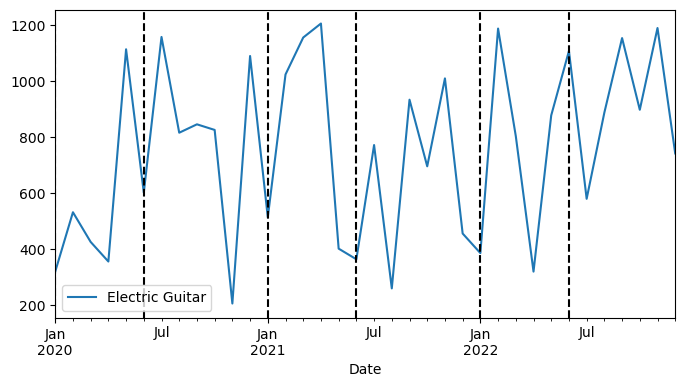

In [165]:
ElectricGuitarplot=data3.plot(x="Date",y="Electric Guitar",figsize=(8,4))
xcoords = ['2020-01-01','2020-06-01','2021-06-01','2022-06-01',
          '2021-01-01','2022-01-01']
    for xc in xcoords:
    ElectricGuitarplot.axvline(x=xc, color='black', linestyle='--')

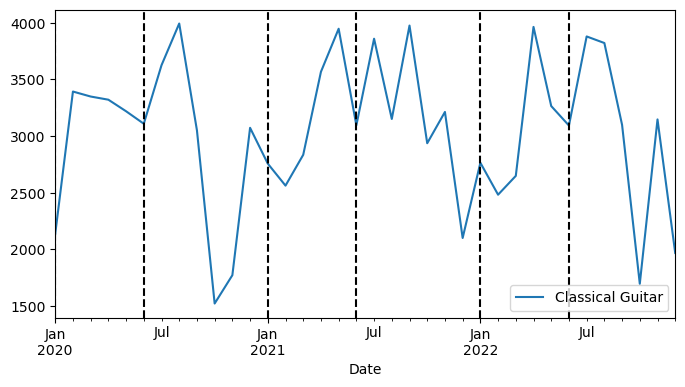

In [166]:
ClassicalGuitarplot=data3.plot(x="Date",y="Classical Guitar",figsize=(8,4))
xcoords = ['2020-01-01','2020-06-01','2021-06-01','2022-06-01',
          '2021-01-01','2022-01-01']
for xc in xcoords:
    ClassicalGuitarplot.axvline(x=xc, color='black', linestyle='--')

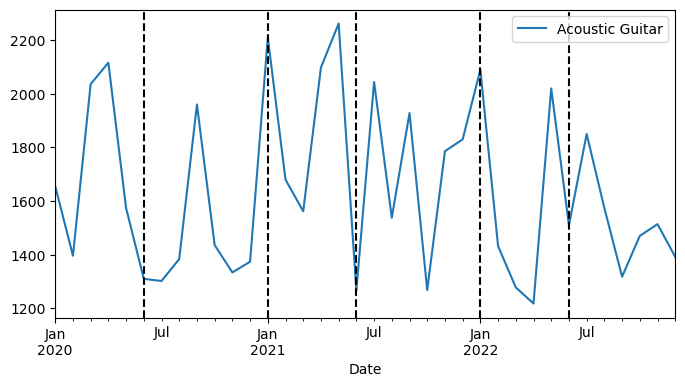

In [167]:
AcousticGuitarplot=data3.plot(x="Date",y="Acoustic Guitar",figsize=(8,4))
xcoords = ['2020-01-01','2020-06-01','2021-06-01','2022-06-01',
          '2021-01-01','2022-01-01']
for xc in xcoords:
    AcousticGuitarplot.axvline(x=xc, color='black', linestyle='--')

Comment: From looking at the plots above we can say its pretty pointless for us to create a line here, except for understanding general trend(increase or decrease)

# Lineer Regression Application for Electro,Classic,Acoustic Gitars



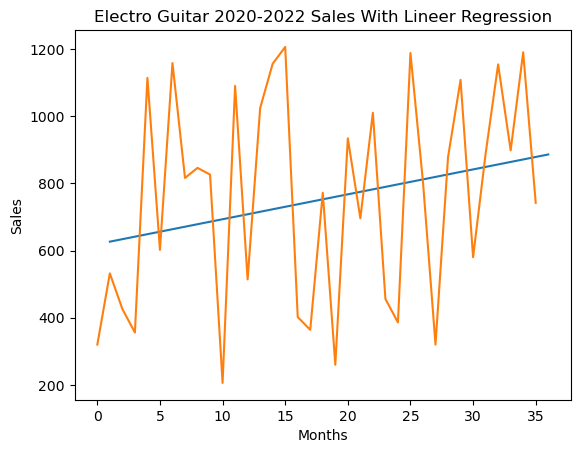

R Square of Regression:0.06046823687928027, 

Intercept of Regression:[619.00952381],

Coefficient of Regression:[[7.41389961]]


C:\Users\ahmet\anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


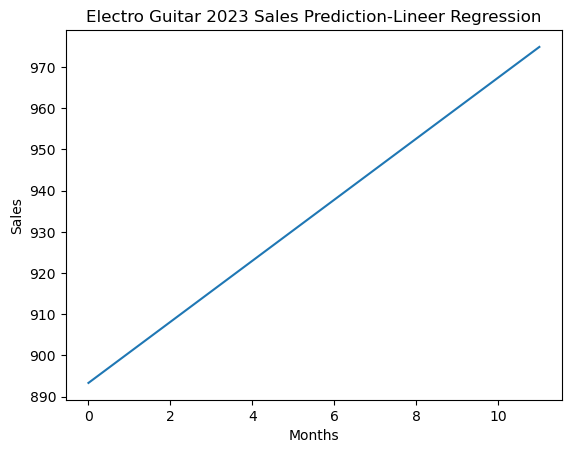

In [148]:
#Firstly, we are looking for electro guitar, we are gonna use Sklearn's LinearRegression
#For applying Linear Regression model to our data we need to do some extra data prep.
#Creating a time array and taking this time array into our dataset

data4=data3.copy()
time=np.arange(1,data4.shape[0]+1)
data4["time"]=time
data4
Xelectro=data4[["time"]]
yelectro=data4[["Electric Guitar"]]

regressor = LinearRegression()
regressor.fit(Xelectro, yelectro)

y_pred_electro = regressor.predict(Xelectro)
plt.plot(Xelectro, y_pred_electro,yelectro)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title('Electro Guitar 2020-2022 Sales With Lineer Regression')
plt.show()
r_square=regressor.score(Xelectro,yelectro)
c = regressor.intercept_
m = regressor.coef_
print("R Square of Regression:{}, \n\nIntercept of Regression:{},\n\nCoefficient of Regression:{}".format(r_square,c,m))
#We get our slope and intercept for our linear model then we are gonna use this for our new X data
#For example i wanted to predict next year's forecast, for that i am using next 12 value of time array 
#And then calclate them with slope and intercept
electro_predictions_lineerRegression=np.array([(i,((i+1)+time[len(time)-1])*m +c) for i in range(12)])

plt.plot(electro_predictions_lineerRegression[0:,0],electro_predictions_lineerRegression[0:,1])
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title('Electro Guitar 2023 Sales Prediction-Lineer Regression')
plt.show()



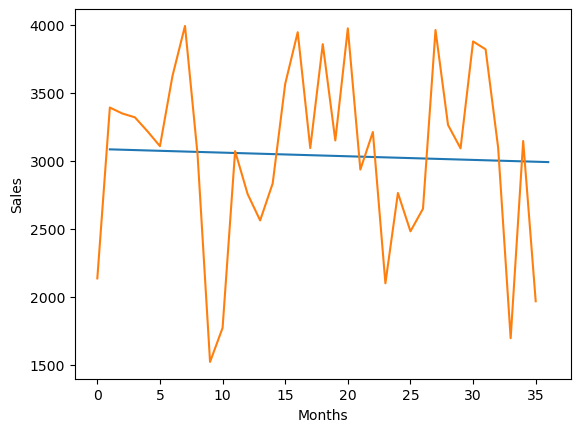

R Square of Regression:0.001741756600361355, 

Intercept of Regression:[3087.27301587],

Coefficient of Regression:[[-2.67541828]]


C:\Users\ahmet\anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


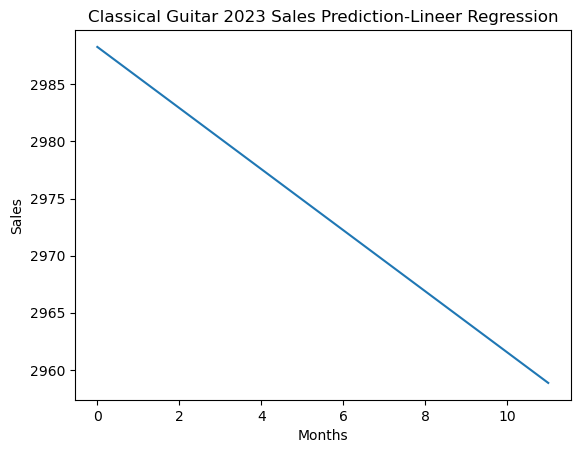

In [149]:
#Same Processes for Classical Guitar

time=np.arange(1,data4.shape[0]+1)
data4["time"]=time

Xclassic=data4[["time"]]
yclassic=data4[["Classical Guitar"]]
regressor = LinearRegression()
regressor.fit(Xclassic, yclassic)

y_pred_classic = regressor.predict(Xclassic)
plt.plot(Xclassic, y_pred_classic,yclassic)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()
r_square=regressor.score(Xclassic,yclassic)
c = regressor.intercept_
m = regressor.coef_
print("R Square of Regression:{}, \n\nIntercept of Regression:{},\n\nCoefficient of Regression:{}".format(r_square,c,m))

classic_predictions_lineerRegression=np.array([(i,((i+1)+time[len(time)-1])*m +c) for i in range(12)])

plt.plot(classic_predictions_lineerRegression[0:,0],classic_predictions_lineerRegression[0:,1])
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title('Classical Guitar 2023 Sales Prediction-Lineer Regression')
plt.show()

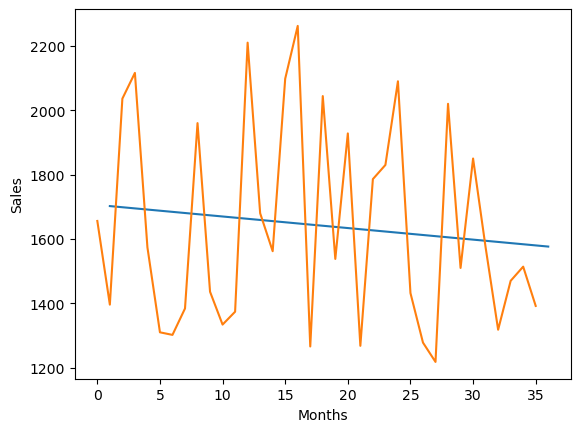

R Square of Regression:0.014175553219402115, 

Intercept of Regression:[1705.82857143],

Coefficient of Regression:[[-3.59433719]]


C:\Users\ahmet\anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


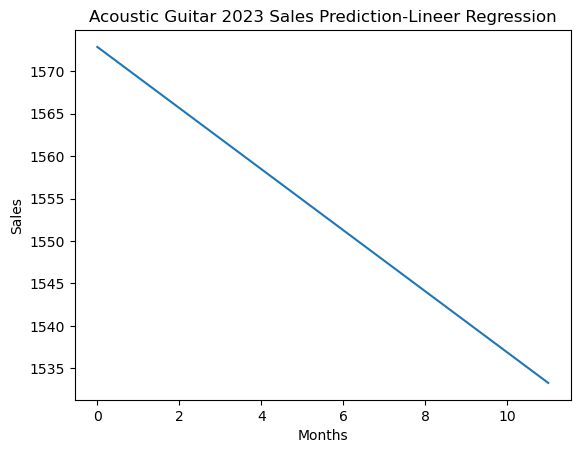

In [13]:
#Same Processes for Acoustic Guitar 
time=np.arange(1,data4.shape[0]+1)
data4["time"]=time

Xacustic=data4[["time"]]
yacustic=data4[["Acoustic Guitar"]]
regressor = LinearRegression()
regressor.fit(Xacustic, yacustic)

y_pred_acustic = regressor.predict(Xacustic)
plt.plot(Xacustic, y_pred_acustic,yacustic)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.show()
r_square=regressor.score(Xacustic,yacustic)
c = regressor.intercept_
m = regressor.coef_
print("R Square of Regression:{}, \n\nIntercept of Regression:{},\n\nCoefficient of Regression:{}".format(r_square,c,m))

acustic_predictions_lineerRegression=np.array([(i,((i+1)+time[len(time)-1])*m +c) for i in range(12)])

plt.plot(classic_predictions_lineerRegression[0:,0],acustic_predictions_lineerRegression[0:,1])
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title('Acoustic Guitar 2023 Sales Prediction-Lineer Regression')
plt.show()

As we can see above, rsquare values are pretty low but we can see general trends for our data for example, while electric guitar sales are increasing, other two variance of guitar are decreasing

In [159]:
#As we would like to wrtie our own linear regression model with plots and mape,square values;
#we can use our time value as x or we can take our Y value's length and create a time from that as you can see from calculations function

yE = data4["Electric Guitar"].copy()
y=yE
#0y needs to be Series
def calculations(y,x=np.arange(1,len(y)+1)):
    XY=y*x
    X2=x*x
    Xavg=np.sum(x)/len(x)
    yavg=np.sum(y)/len(y)
    XYsum=np.sum(x*y)
    X2sum=np.sum(X2)
    b=(XYsum-(len(y)*Xavg*yavg))/(X2sum-(len(y)*Xavg*Xavg))
    a=yavg-(b*Xavg)
    return a,b

#a intercept, b slope

def rsquaredd(y,ypred):
    return (1-(np.sum((y-ypred)**2)/np.sum((y-(np.sum(y)/len(y)))**2)))
    
    

def mape(y,ypred):
    return np.sum(np.abs((y-ypred)/y))/len(y)



def linearRegg(Y,X):
    a,b=calculations(Y,x=X)
    ypredd=a+b*X
    Mape=mape(Y,ypredd)
    rsqu=rsquaredd(Y,ypredd)
    return Mape,ypredd,rsqu

#If we want to plot the regression we can say, verbose=True

def linear_Reg_Pred(Y,X,Xnew,verbose=False):
    a,b=calculations(Y,x=X)
    ypred=a+b*Xnew
    ypred_previous=a+b*X
    ypred_all=np.append(ypred_previous,ypred)
    X_all=np.append(X,Xnew)
    if verbose:
        plt.plot(Xnew, ypred,Y)
        plt.plot(X_all,ypred_all)
    return ypred
    
    
    

array([885.90990991, 893.32380952, 900.73770914, 908.15160875,
       915.56550837, 922.97940798, 930.39330759, 937.80720721,
       945.22110682, 952.63500644, 960.04890605, 967.46280566,
       974.87670528])

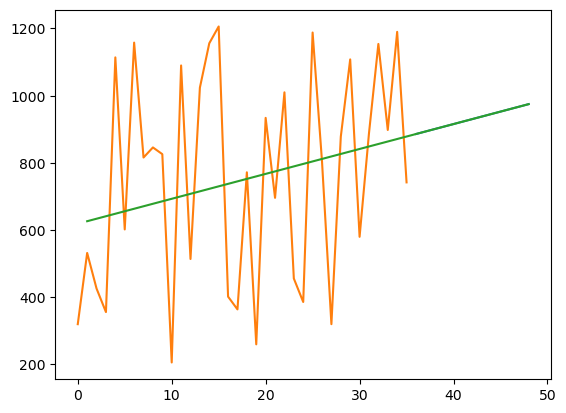

In [160]:
#For next year we create a array that has next years months,Xwant
Xwant=np.arange(36,49)
Xwant
#Uncomment one and see the result
linear_Reg_Pred(data4["Electric Guitar"],data4["time"],Xwant,verbose=True)
#linear_Reg_Pred(data4["Classical Guitar"],data4["time"],Xwant,verbose=True)
#linear_Reg_Pred(data4["Acoustic Guitar"],data4["time"],Xwant,verbose=True)
#linearRegg(data4["Acoustic Guitar"],data4["time"])

For the rest of  notebook we are going to use seasonality method, i have found sklearn has decompose package for seasonality but i could not find a way to predict future results with it. 
And i had decided to write my own code for Seasonality(Multiplicative Approcach)

# Seasonality Application For Our Data

In [154]:

data5=data3.copy()
#data5.set_index('Date', inplace=True).copy()
data5.head(3)

,Electric Guitar,Classical Guitar,Acoustic Guitar
Date,,,
2020-01-01,320,2136,1656
2020-02-01,532,3392,1396
2020-03-01,426,3348,2036


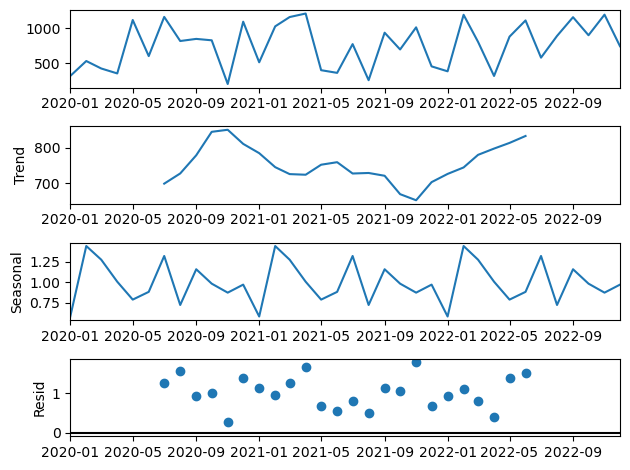

In [161]:
#With decompose package we are goiong to use "multiplicative" and plotting results for Electric Guitar data

yelectroS = data5[['Electric Guitar']].copy()


decompose_result_additive = seasonal_decompose(yelectroS, model="multiplicative")

trend = decompose_result_additive.trend
seasonal = decompose_result_additive.seasonal
residual = decompose_result_additive.resid

decompose_result_additive.plot();


In [130]:
#For writing Seasonality Functions we need to calculate Seasonal Factor and with using this factor we need deseasonalized (Y)
#After getting deseasonalized(Y) we can use linear regression with deseasonalized data and get  slope and intercept
#Lastly, our formula is: y_pred[i]=(a+b*X)*SeasonalFactor[i]
#For getting forecast we need to preserve seasonal factor by its order and again use the formula above

data5=data4[["Electric Guitar"]].copy()


#Every 12th will get us seasonal factor of our current data, we can change it but i am currently seeing no reason for this

def seasonalFactor(y,periodd=12):
    y=y.squeeze()
    yE=np.array(y)
    yavg=np.sum(yE)/len(yE)
    Seasonal_Factor=np.zeros(len(yE))
    for m in range(0,periodd):
        Seasonal_Factor[m]=(np.sum([yE[i] for i in range(m,len(yE),periodd)])/(len(yE)/periodd))/yavg
    for aa in range(periodd,len(yE)):
        Seasonal_Factor[aa]=Seasonal_Factor[aa-periodd]
        deseasonalized= yE/Seasonal_Factor
    return Seasonal_Factor,deseasonalized


def calculations(y):
    x=np.arange(1,len(y)+1)
    XY=y*x
    X2=x*x
    Xavg=np.sum(x)/len(x)
    yavg=np.sum(y)/len(y)
    XYsum=np.sum(x*y)
    X2sum=np.sum(X2)
    b=(XYsum-(len(y)*Xavg*yavg))/(X2sum-(len(y)*Xavg*Xavg))
    a=yavg-(b*Xavg)
    return a,b

#a intercept, b slope of desasonalized demand

def deseasonalizedRegression(Y):
    SeasonalF,deseasonalized=seasonalFactor(Y)
    a,b=calculations(deseasonalized)
    X= np.arange(1,Y.shape[0]+1)
    ypred_deseason=a+b*X
    ypredd=ypred_deseason*SeasonalF
    rsqu=rsquaredd(np.array(Y.squeeze()),ypredd)
    Mape=mape(np.array(Y.squeeze()),ypredd)
    return ypredd,rsqu,Mape
    


def rsquaredd(y,ypred):
    return (1-(np.sum((y-ypred)**2)/np.sum((y-(np.sum(y)/len(y)))**2)))
    
    

def mape(y,ypred):
    return np.sum(np.abs((y-ypred)/y))/len(y)


#We can make verbose=True and make plotting

def Seasonal_Reg_Pred(Y,Xnew,verbose=False,periodd=12):
    Seasonal,deseasonal=seasonalFactor(Y,periodd)
    a,b=calculations(deseasonal)
    SeasonalLimitless=np.array((Seasonal.tolist())*len(Xnew)) #For making it possible to adapt every length of Xnew, multiply wit Xnew and take the first len(Xnew) of it
    ypred=(a+b*Xnew)*SeasonalLimitless[:len(Xnew)]
    X_all=np.append(np.arange(1,len(np.array(Y.squeeze()))+1),Xnew)
    y_all=np.append(Y,ypred)
    if verbose:
        plt.plot(X_all,y_all,label="previous")
        plt.plot(Xnew,ypred,label="Forecasted")
        plt.legend()
        
    return ypred
    
    
    



C:\Users\ahmet\anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  


array([ 457.83036996, 1036.31885561,  906.83186369,  719.78985965,
        921.3464624 ,  803.16257053,  978.01987692,  769.9779114 ,
       1157.29343276,  960.34949066,  960.55955168,  918.9328383 ,
        492.91405222])

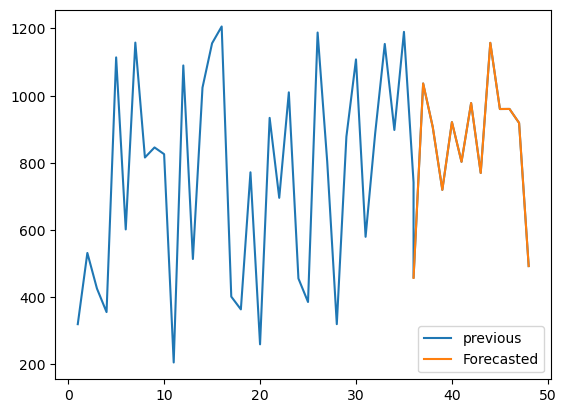

In [131]:
#For Electric Guitar
ypred,rsquare,Mape=deseasonalizedRegression(data5)
ypred
rsquare
Mape


Seasonal_Reg_Pred(data5,Xwant,verbose=True)
Mape

C:\Users\ahmet\anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  


0.12815504646155562

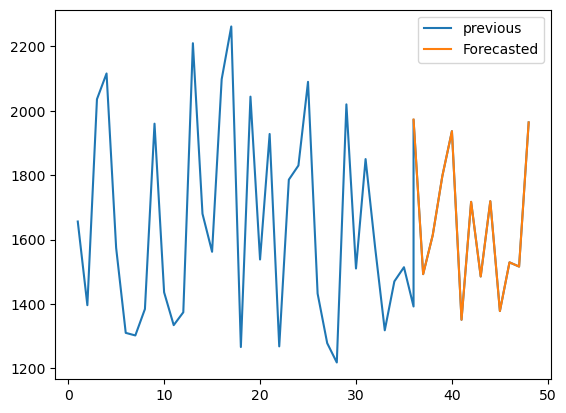

In [163]:
#For Acoustic Guitar

data6=data4[["Acoustic Guitar"]]
data6
Seasonal_Reg_Pred(data6,Xwant,verbose=True)
ypred,rsquare,Mape=deseasonalizedRegression(data6)
Mape

C:\Users\ahmet\anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  


0.1236306792684539

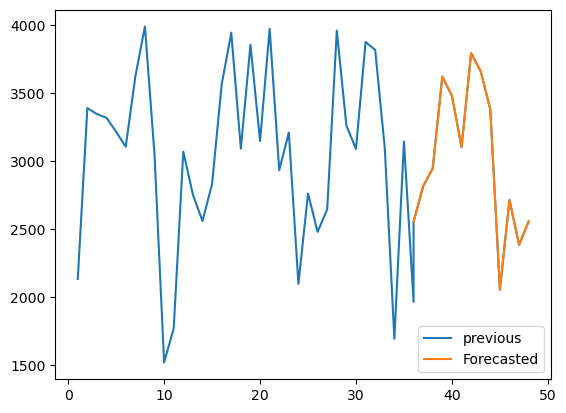

In [162]:
# For Classic Guitar

data7=data4[["Classical Guitar"]]
data7
Seasonal_Reg_Pred(data7,Xwant,verbose=True)
ypred,rsquare,Mape=deseasonalizedRegression(data7)
Mape

As you can see from these examples using seasonality is better choice for most of them(except Electric Guitar, it's Rsquare value and Mape values are from ideal)

Extra: Probably you are seeing errors that mentions divide by zero encountered, by i didnt get it and calculations seems true 